In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from numpy import asarray, save
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [6]:
folder1 = 'Dataset/train/smiley/'
folder2 = 'Dataset/train/frown/'
photos, labels = list(),list()

for file in listdir(folder1):
    output=0.0
    if (file.startswith('Smile') or file.startswith('aug_') ):
        output =1.0
    photo = load_img(folder1 + file, target_size=(64,64))
    photo=img_to_array(photo)
    
    photos.append(photo)
    labels.append(output)
for file in listdir(folder2):
    output=1.0
    if (file.startswith('Frown') or file.startswith('aug_') ):
        output =0.0
    photo = load_img(folder2 + file, target_size=(64,64))
    photo=img_to_array(photo)
    
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels=asarray(labels)
print(photos.shape, labels.shape)

save('train_smiley_frown_photos.npy', photos)
save('train_smiley_frown_labels.npy', labels)

(630, 64, 64, 3) (630,)


In [7]:
folder1 = 'Dataset/valid/smiley/'
folder2 = 'Dataset/valid/frown/'
photos, labels = list(),list()

for file in listdir(folder1):
    output=0.0
    if (file.startswith('Smile') or file.startswith('aug_') ):
        output =1.0
    photo = load_img(folder1 + file, target_size=(64,64))
    photo=img_to_array(photo)
    
    photos.append(photo)
    labels.append(output)
for file in listdir(folder2):
    output=1.0
    if (file.startswith('Frown') or file.startswith('aug_') ):
        output =0.0
    photo = load_img(folder2 + file, target_size=(64,64))
    photo=img_to_array(photo)
    
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels=asarray(labels)
print(photos.shape, labels.shape)

save('test_smiley_frown_photos.npy', photos)
save('test_smiley_frown_labels.npy', labels)

(10, 64, 64, 3) (10,)


In [1]:
import numpy as np
from numpy import load
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
x_train = load('train_smiley_frown_photos.npy')
y_train = load('train_smiley_frown_labels.npy')
x_test = load('test_smiley_frown_photos.npy')
y_test = load('test_smiley_frown_labels.npy')

In [3]:
 print(x_train.shape)

(630, 64, 64, 3)


In [4]:
x_train = x_train[:,:,:,1]
x_test = x_test[:,:,:,1]

In [5]:
print(x_train.shape,x_test.shape)

(630, 64, 64) (10, 64, 64)


In [6]:
x_train = x_train.reshape(630,64,64,1)
x_test = x_test.reshape(10,64,64,1)

In [7]:
print(x_train.shape,x_test.shape)


(630, 64, 64, 1) (10, 64, 64, 1)


(64, 64, 1)


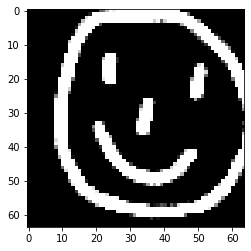

In [8]:
print(x_train[0].shape)
pl = x_train[0].reshape(64,64)
plt.imshow(pl, cmap="gray")
plt.show()

In [9]:
print(y_train[7])
from keras.optimizers import Adam
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

1.0


In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(64, 64, 1)))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [26]:
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=5)

Train on 630 samples, validate on 10 samples
Epoch 1/5
630/630 [==============================] - 4s 7ms/step - loss: 67.7682 - accuracy: 0.6175 - val_loss: 15.8480 - val_accuracy: 0.9000
Epoch 2/5
630/630 [==============================] - 4s 7ms/step - loss: 4.5416 - accuracy: 0.8905 - val_loss: 2.5645 - val_accuracy: 0.7000
Epoch 3/5
630/630 [==============================] - 4s 6ms/step - loss: 0.1609 - accuracy: 0.9825 - val_loss: 1.0841 - val_accuracy: 0.9000
Epoch 4/5
630/630 [==============================] - 4s 6ms/step - loss: 0.0225 - accuracy: 0.9968 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 5/5
630/630 [==============================] - 4s 6ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.1786 - val_accuracy: 0.9000


In [28]:
import cv2

In [41]:
img = cv2.imread('Dataset/test/smiley/f2.png')
print(img.shape)
grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
print(grey.shape)

(64, 64, 3)
(64, 64)


In [42]:
predictions=model.predict(grey.reshape(1,64,64,1))

In [43]:
print(predictions.argmax())

0


In [44]:
model.save('Smiley_Recognition.h5')